In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import pylab as pl
import scipy.optimize
from scipy.stats import spearmanr
from IPython.display import Image 
# ISH_data_processed=pd.read_csv('data/ISH_processed_data_strict.csv')
# allen_brain_reg_coords=pd.read_csv('data/allen_brain_reg_coords.csv')
# allen_brain_reg_coords.drop('Unnamed: 0',axis=1,inplace=True)
gene_exp=pd.read_csv('notebook10data/ROI_ISH_data.csv')
# druglist=['amphetamine','caffeine','carbamazepine',
#          'cocaine','ethanol','fluoxetine','ketamine',
#          'meth','morphine','nicotine','stress','toluene']#,'All_Drugs']
druglist=['amphetamine',
         'cocaine',
         'meth','morphine','nicotine']#,'All_Drugs']
regions=list(gene_exp['brain_region2']) 

In [35]:
rabies=pd.read_csv('data/rabies.input.regions.csv') #
allen=pd.read_csv('data/allen.umap.means.csv')
allen.set_index('Unnamed: 0',inplace=True)
allen.rename(columns={"VP": "PALv", "DStr": "STRd", "PBN": "PB", "BNST": "BST", 
                      "DCN": "CBN","IL and PL":"Anterior Cortex"},inplace=True)
allen.rename(index={"VP": "PALv", "DStr": "STRd", "PBN": "PB", "BNST": "BST", 
                    "DCN": "CBN","IL and PL":"Anterior Cortex"},inplace=True)
allen.sort_index(axis=0, inplace=True)
allen.sort_index(axis=1, inplace=True)
allen

,Anterior Cortex,BST,CBN,CeA,DR,EAM,GPe,GPi,LDT,LH,...,NAcCore,NAcMedS,Orb,PALv,PB,PO,PVH,STRd,Septum,ZI
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Anterior Cortex,0.000000,0.802085,0.767738,0.771835,0.782352,0.774943,0.265669,0.782261,0.800444,0.804958,...,0.203949,0.160810,0.154059,0.778658,0.768799,0.799954,0.804264,0.270487,0.804120,0.778118
BST,0.802085,0.000000,0.831711,0.838632,0.849890,0.841891,0.802533,0.848000,0.216539,0.167614,...,0.802975,0.801172,0.803951,0.845314,0.835128,0.160865,0.215169,0.803782,0.251109,0.842832
CBN,0.767738,0.831711,0.000000,0.169033,0.294559,0.220469,0.776517,0.295624,0.837856,0.833254,...,0.773216,0.770546,0.767989,0.273276,0.148798,0.834828,0.836934,0.778706,0.840575,0.252704
CeA,0.771835,0.838632,0.169033,0.000000,0.253237,0.183568,0.776176,0.245237,0.844591,0.840179,...,0.773602,0.775308,0.770345,0.240015,0.164297,0.841663,0.843733,0.778275,0.847252,0.202350
DR,0.782352,0.849890,0.294559,0.253237,0.000000,0.202048,0.784735,0.247196,0.855803,0.851501,...,0.784415,0.785988,0.780695,0.154553,0.272407,0.852860,0.854943,0.785108,0.858415,0.261890
EAM,0.774943,0.841891,0.220469,0.183568,0.202048,0.000000,0.777365,0.260176,0.847876,0.843475,...,0.776943,0.778483,0.773361,0.163779,0.184246,0.844897,0.847001,0.778572,0.850546,0.244034
GPe,0.265669,0.802533,0.776517,0.776176,0.784735,0.777365,0.000000,0.784493,0.799565,0.808537,...,0.175975,0.230754,0.239253,0.781103,0.775885,0.801504,0.807617,0.140917,0.805191,0.780365
GPi,0.782261,0.848000,0.295624,0.245237,0.247196,0.260176,0.784493,0.000000,0.853805,0.849541,...,0.784034,0.785883,0.780292,0.271562,0.291483,0.850980,0.852980,0.784578,0.856364,0.155937
LDT,0.800444,0.216539,0.837856,0.844591,0.855803,0.847876,0.799565,0.853805,0.000000,0.210169,...,0.801440,0.799879,0.802007,0.851297,0.841033,0.163182,0.172717,0.802473,0.164974,0.848675


In [32]:
regions

['ACB',
 'Anterior Cortex',
 'BST',
 'CBN',
 'CEA',
 'DR',
 'EAM',
 'GPe',
 'GPi',
 'LDT',
 'LH',
 'LHA',
 'MH',
 'PALv',
 'PB',
 'PO',
 'PVH',
 'STRd',
 'Septum',
 'ZI']

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


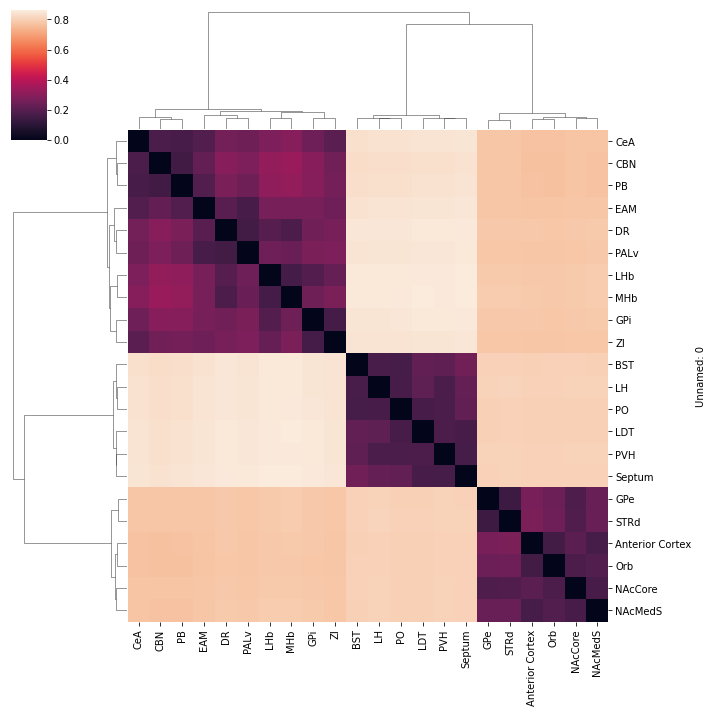

In [36]:
ax = sns.clustermap(allen)

# Load data & packages

In [2]:
note8= pd.DataFrame(columns = ['gene','spearman_correlation','p_vals','drug'])
for drug in druglist:
    dfname='notebook8data/ISH_data_'+drug+'_ratio_spearmancorr.csv'
    temp=pd.read_csv(dfname, usecols = ['gene','spearman_correlation','p_vals'])
    temp['drug']=drug
    note8=pd.concat([note8, temp], axis=0)

In [3]:
notedatas8= pd.DataFrame(columns = ['brain_region2','ratio_drugviso'])
for drug in druglist:
    dfname='notebook8data/'+drug+'_v_iso_rabies.csv'
    temp=pd.read_csv(dfname, usecols = ['brain_region2','ratio_drugviso'])
    temp['drug']=drug
    notedatas8=pd.concat([notedatas8, temp], axis=0)

In [4]:
lst1=list(gene_exp['brain_region2'])
lst1[2]= 'group1' #BST
lst1[7]= 'group1' #GPE
lst1[8]= 'group1' #GPI
lst1[4]= 'group1' #CEA
lst1[10]= 'group1' #LH
lst1[5]= 'group1' #DR
lst1[19]= 'group1' #ZI
lst1[14]= 'group1' #PBN
lst1[3]= 'group1' # DCN -> CBN
# would also be useful to examine what kinds of genes 
#are elevated or depressed in that group of regions relative
#to the rest 
#  (BNST, GPI, GPE, CeA, LH, ZI, DR, PBN, DCN) === 'group1'
#(EAM, EP, LH, DR, PBN) === 'group2'
# (NACMED, NACCORE, DSTR, SEPTUM, MHB) 

In [5]:
lst3=list(gene_exp['brain_region2'])
lst3[0]= 'group1' # ACB - NACMED and NACLAT AND  
lst3[12]= 'group1' # mhb
lst3[18]= 'group1' # septum
lst3[17]= 'group1' # strd
# would also be useful to examine what kinds of genes 
#are elevated or depressed in that group of regions relative
#to the rest 
#  (BNST, GPI, GPE, CeA, LH, ZI, DR, PBN, DCN) === 'group1'
#(EAM, EP, LH, DR, PBN) === 'group2'
# (NACMED, NACCORE, DSTR, SEPTUM, MHB)  

In [6]:
lst2=list(gene_exp['brain_region2']) 
lst2[6]= 'group1' #EAM
lst2[8]= 'group1' #GPI 
lst2[10]= 'group1' #LH
lst2[5]= 'group1' #DR 
lst2[14]= 'group1' # 
# would also be useful to examine what kinds of genes 
#are elevated or depressed in that group of regions relative
#to the rest 
#  (BNST, GPI, GPE, CeA, LH, ZI, DR, PBN, DCN) === 'group1'
# (NACMED, NACCORE, DSTR, SEPTUM, MHB)  

In [7]:
def plot_high(lst1,thresh):
    gene_exp['brain_region2']=lst1
    groupexp1 = gene_exp.groupby(['brain_region2']).mean()
    gene_list=[]
    for gne in list(groupexp1.columns):
        vals=list(groupexp1[gne])
        max_value = max(vals)
        meanval=np.mean(vals)
        stdval=np.std(vals)
        diff1=max_value-meanval
        max_index = vals.index(max_value)
        labels=list(groupexp1[gne].index)
        thresh2=stdval*thresh
        if ((labels[max_index]=='group1') and (diff1>thresh2)):
            fig = plt.figure(figsize=(9,4))
            ax = fig.add_axes([0,0,1,1])

            ax.bar(labels,vals)
            plt.title(gne)
            plt.xlabel('Brain region')
            plt.ylabel('Gene expression')
            plt.show()
            gene_list.append(gne)
    return gene_list

In [8]:
def plot_low(lst1,thresh):
    gene_exp['brain_region2']=lst1
    groupexp1 = gene_exp.groupby(['brain_region2']).mean()
    gene_list=[]
    for gne in list(groupexp1.columns):
        vals=list(groupexp1[gne])
        max_value = min(vals)
        meanval=np.mean(vals)
        diff1=max_value-meanval
        stdval=np.std(vals)
        max_index = vals.index(max_value)
        labels=list(groupexp1[gne].index)
        thresh2=stdval*thresh
        if ((labels[max_index]=='group1') and (diff1< thresh2)):
            fig = plt.figure(figsize=(9,4))
            ax = fig.add_axes([0,0,1,1])

            ax.bar(labels,vals)
            plt.title(gne)
            plt.xlabel('Brain region')
            plt.ylabel('Gene expression')

            plt.show()
            gene_list.append(gne)
    return gene_list

# BNST, GPI, GPE, CeA, LH, ZI, DR, PBN, DCN

Labelled as group1 on bar plots.

Only showing genes where 

1. These genes are the highest expressed in group1 AND
2. The difference between the max or min and mean value is over a threshold (2 std devs away from the mean)

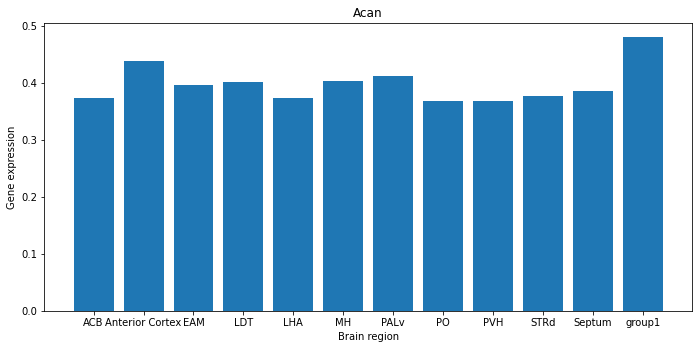

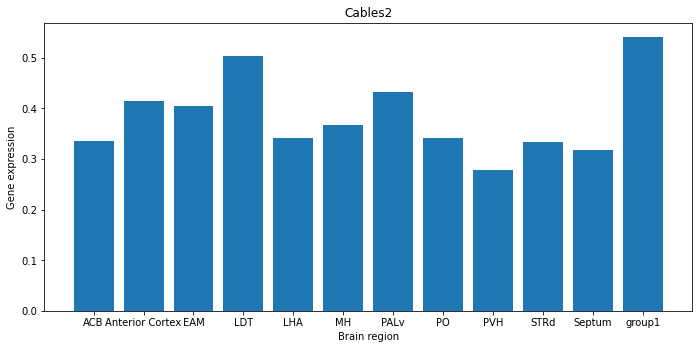

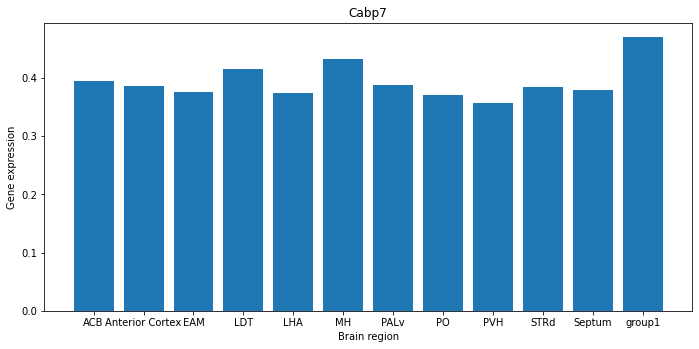

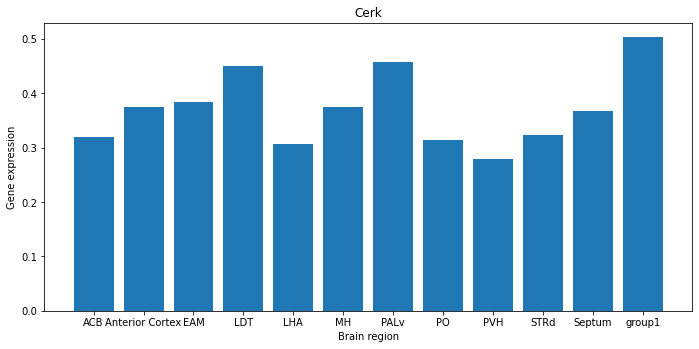

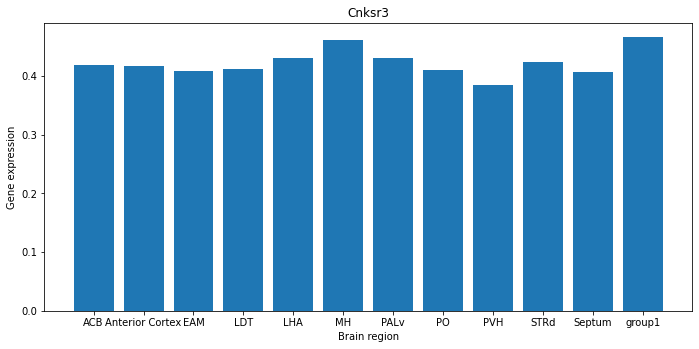

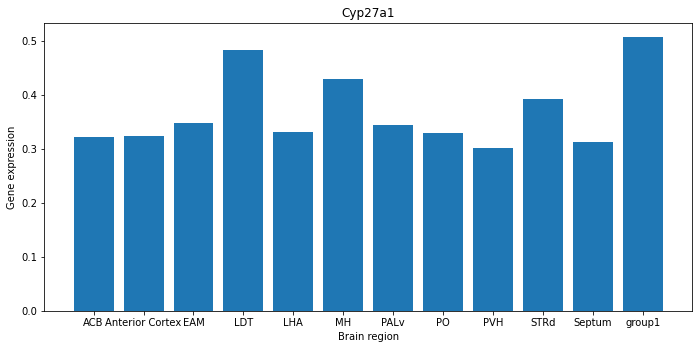

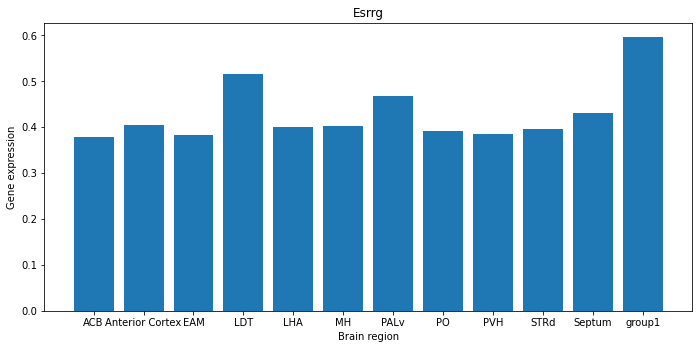

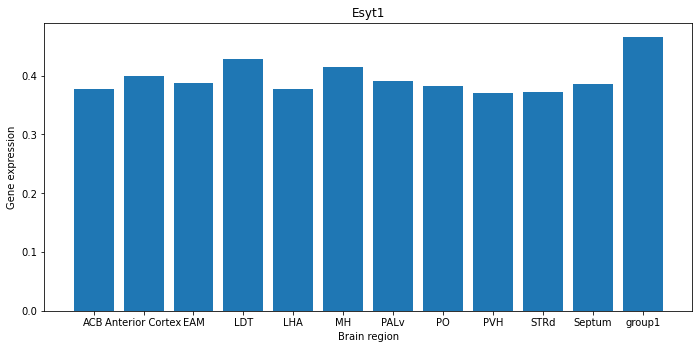

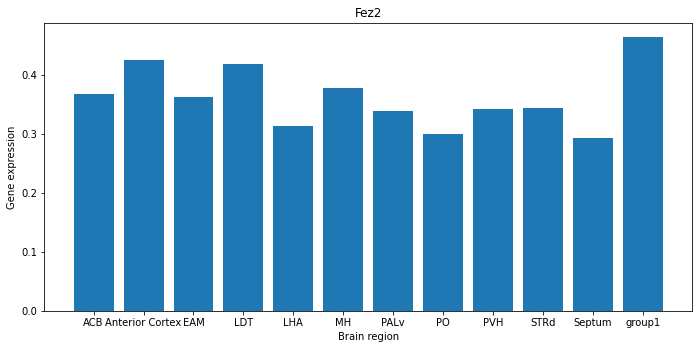

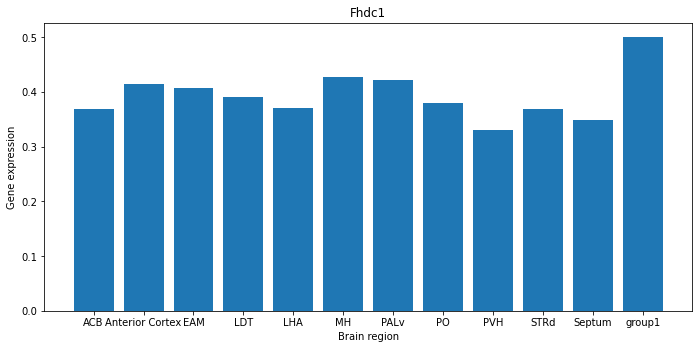

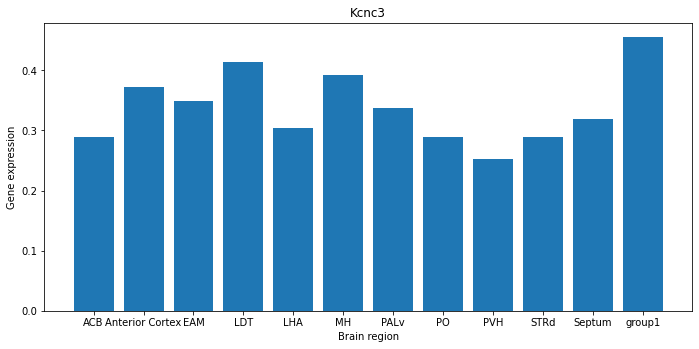

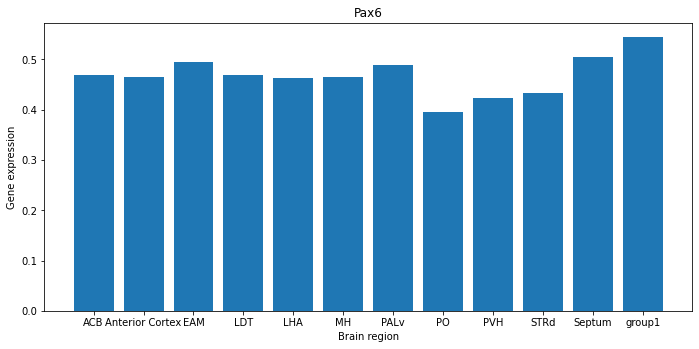

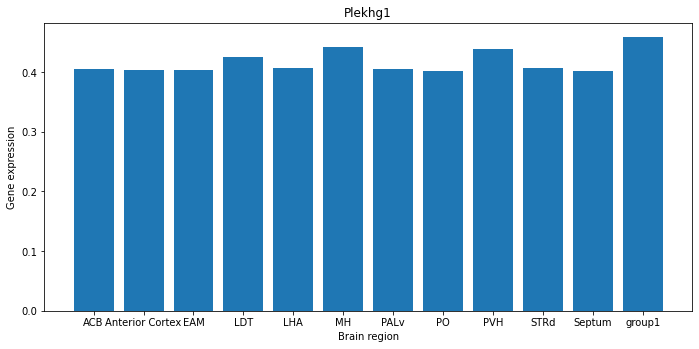

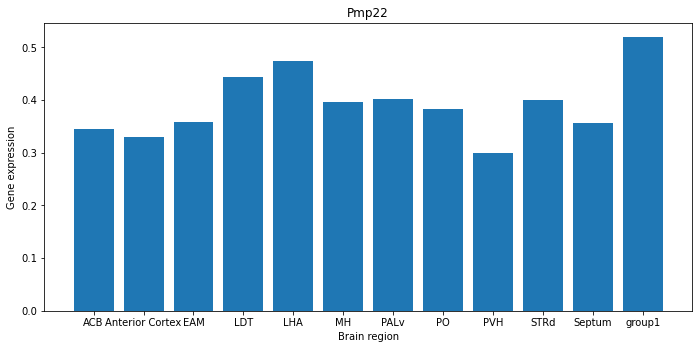

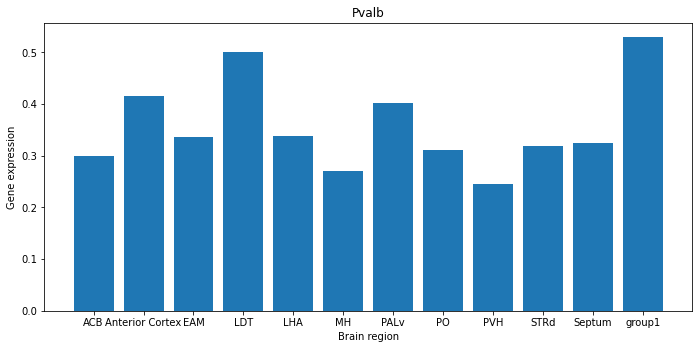

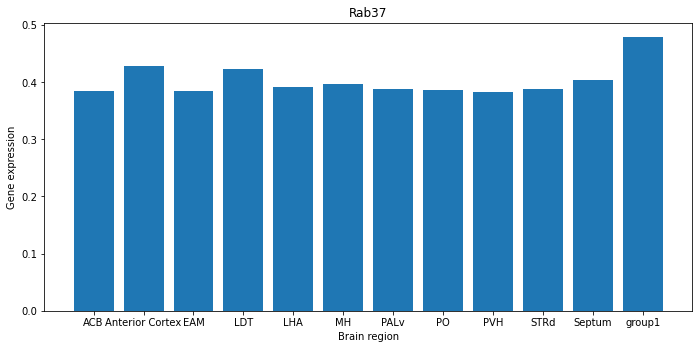

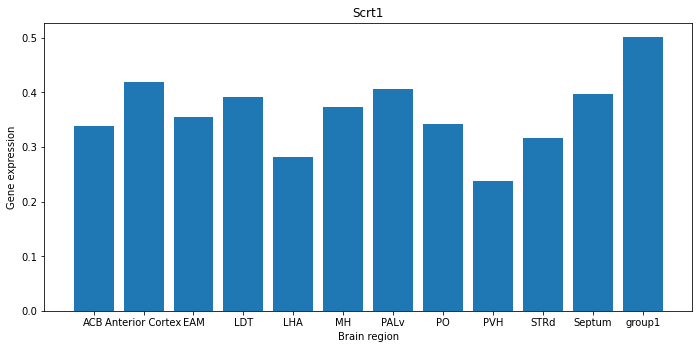

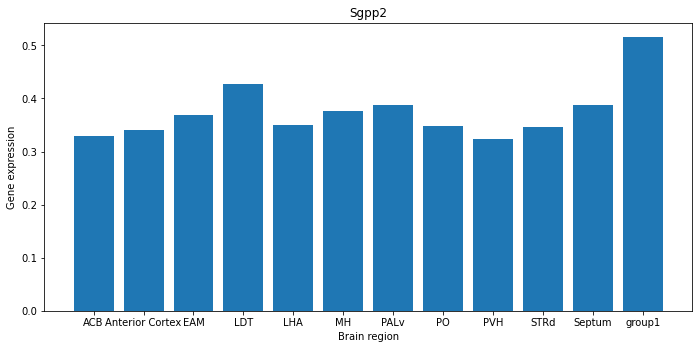

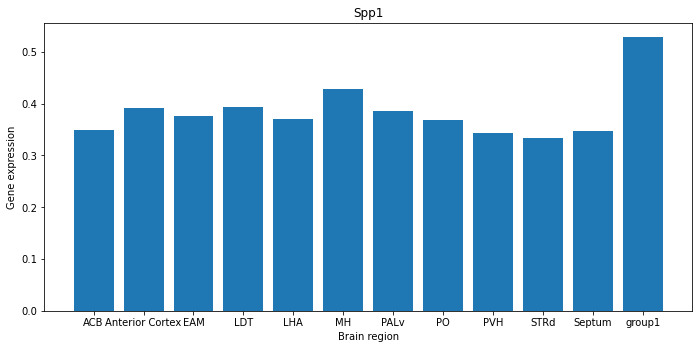

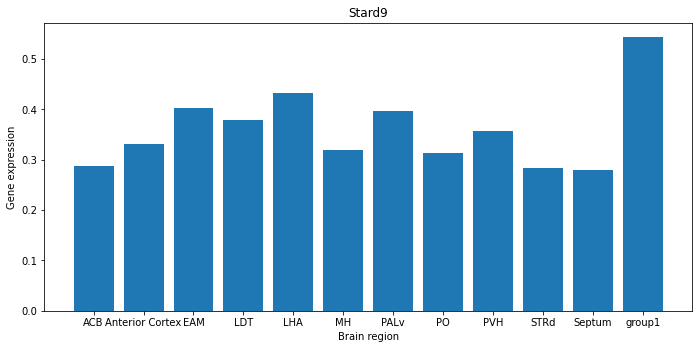

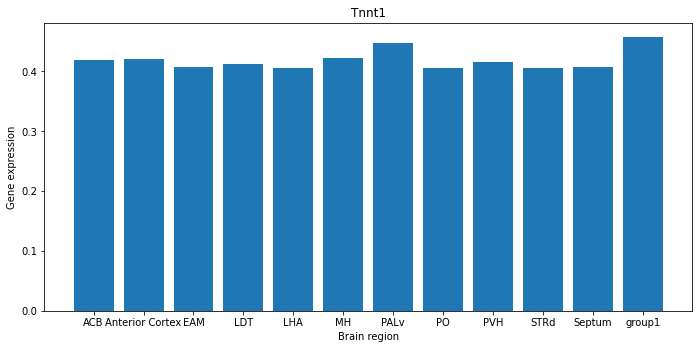

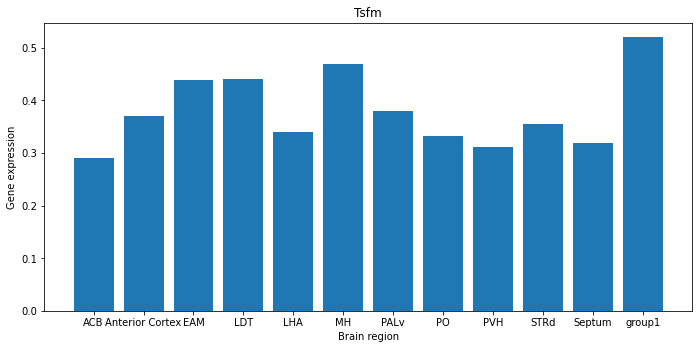

In [9]:
genelist1=plot_high(lst1,thresh=2) #thresh = number standard deviations away from mean
#BNSTtoDCN_high

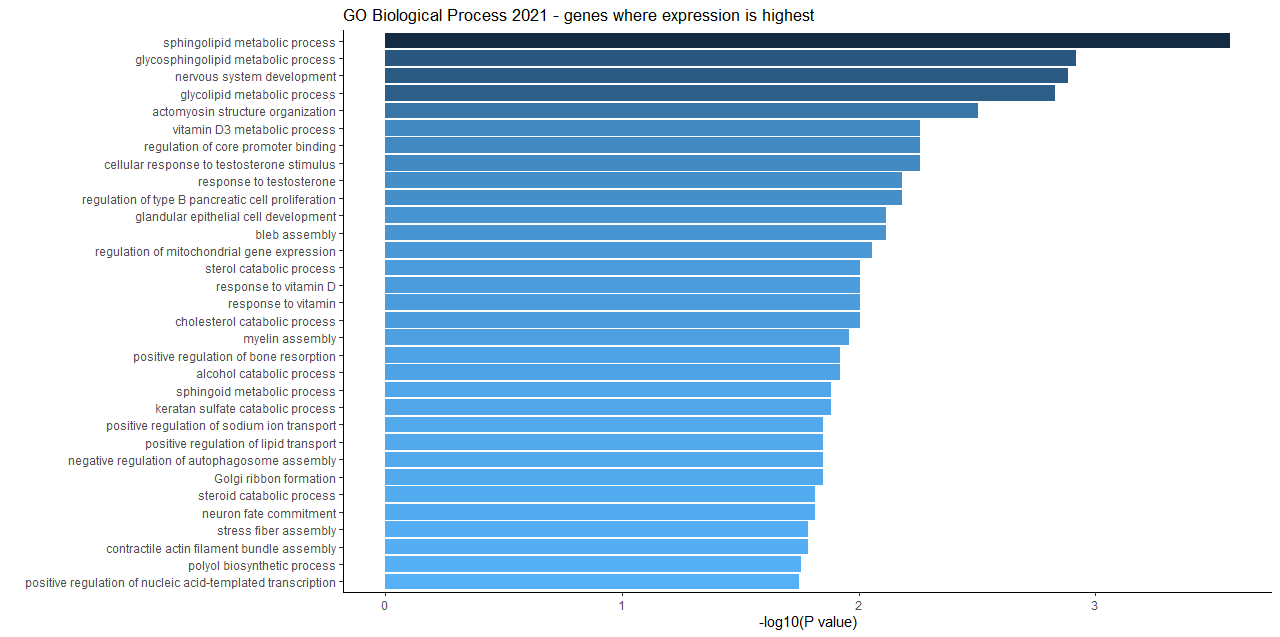

In [10]:
Image('data/BNSTtoDCN_high.png')

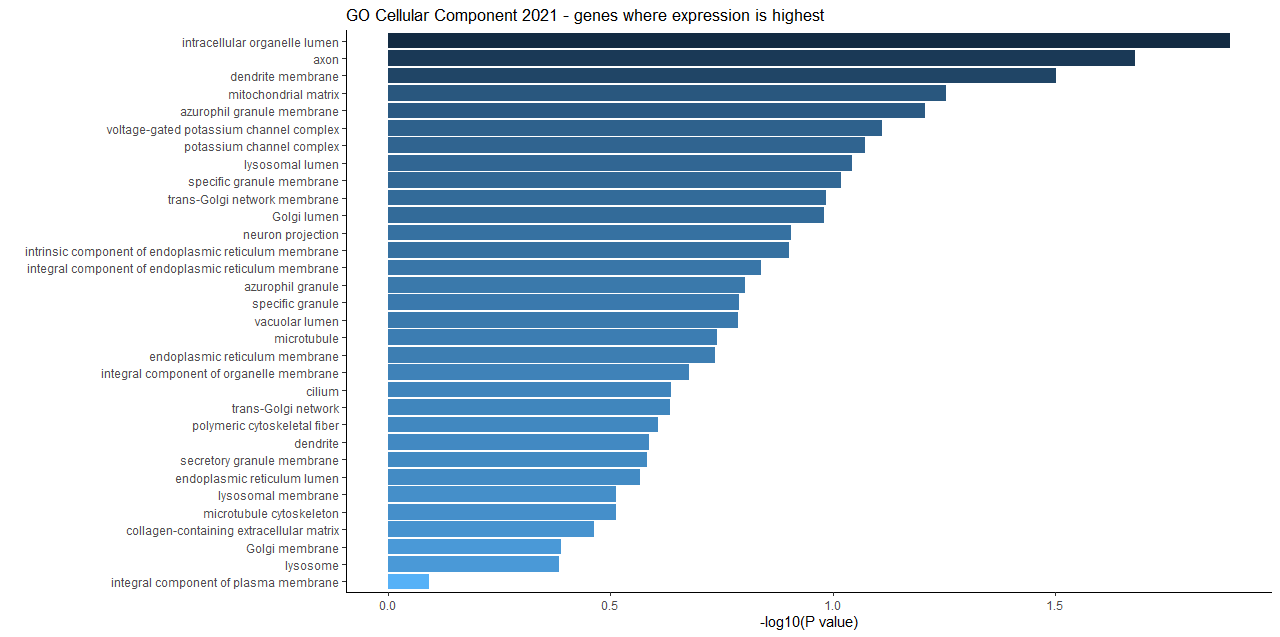

In [11]:
Image('data/BNSTtoDCN_high2.png')

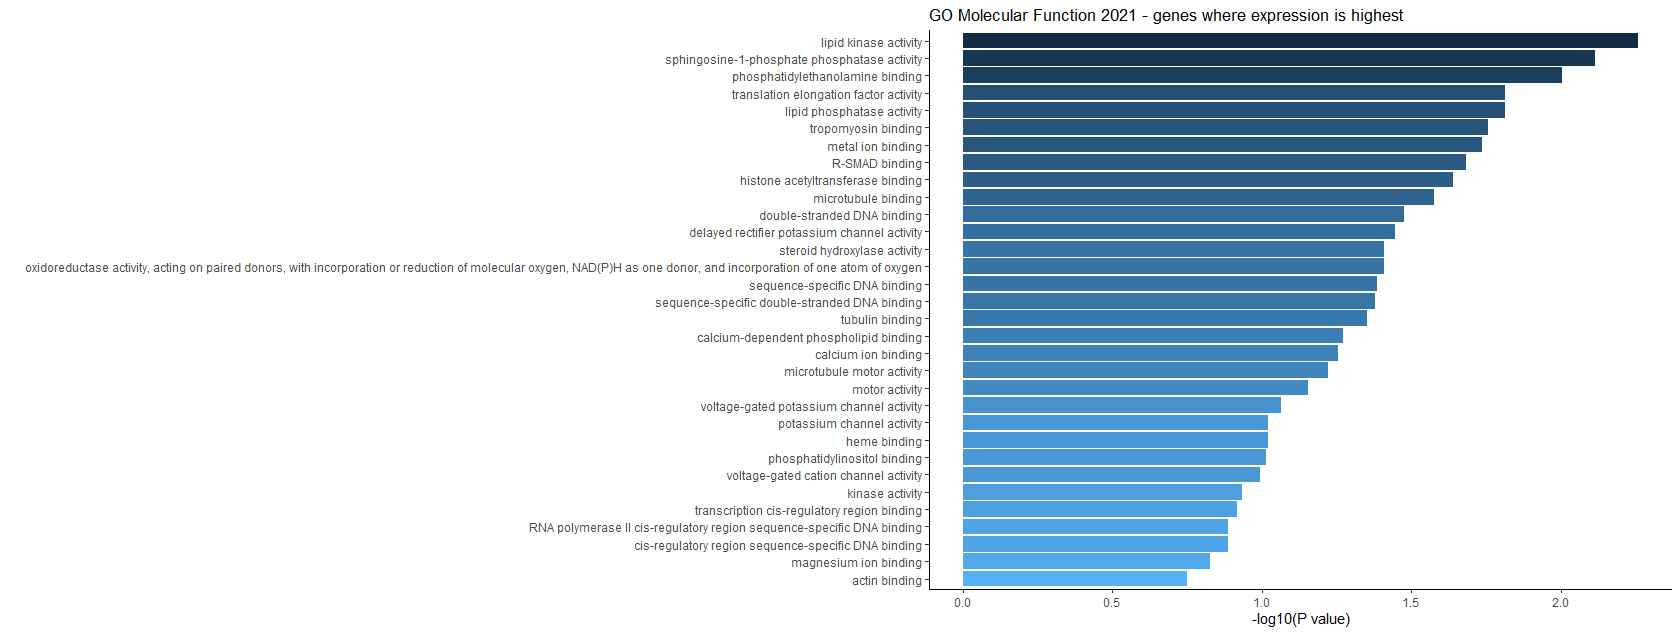

In [12]:
Image('data/BNSTtoDCN_high3.png')

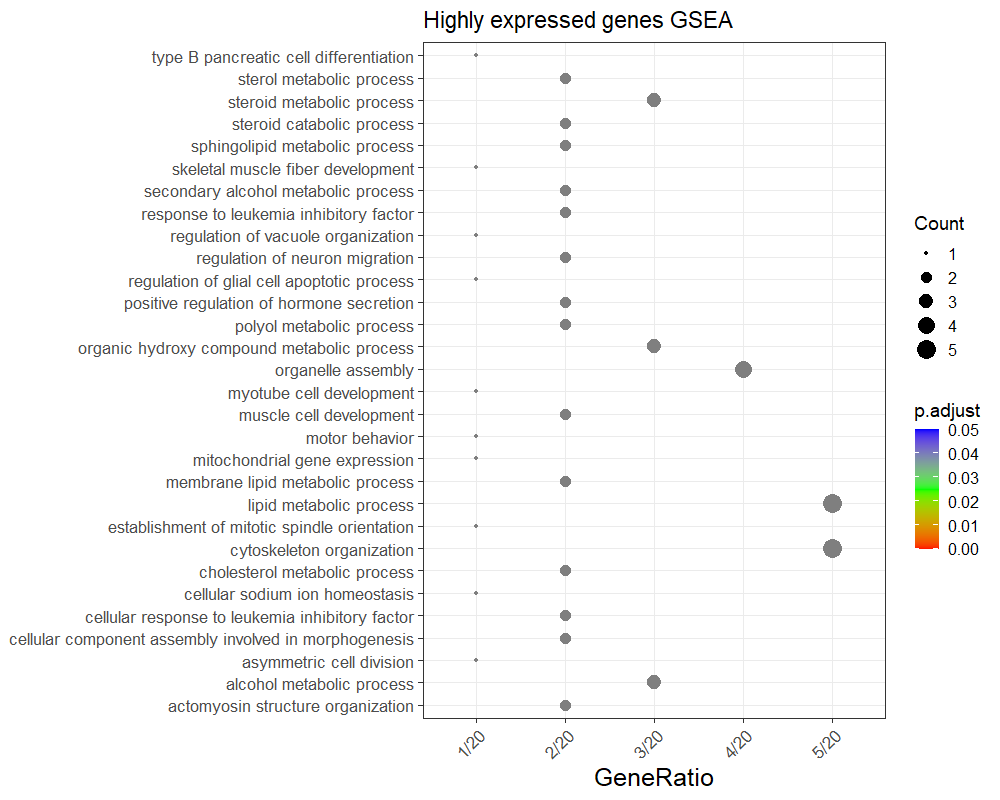

In [13]:
Image('data/dotplot_1GO.png')

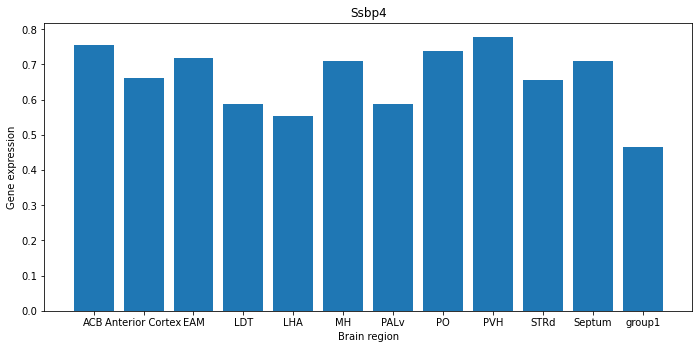

In [14]:
genelist2=plot_low(lst1,thresh=-2)

# EAM, EP, LH, DR, PBN

Labelled as group1 on bar plots.

Only showing genes where 

1. These genes are the highest expressed in group1 AND
2. The difference between the max or min and mean value is over a threshold (2 std devs away from the mean)

There are No genes where expression is LOWEST in this group

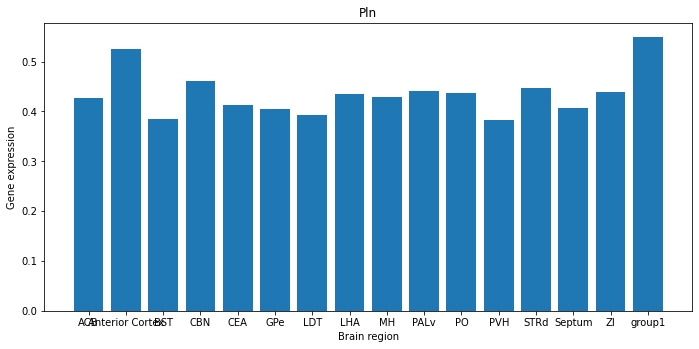

In [15]:
genelist3=plot_high(lst2,thresh=2)

In [16]:
genelist4=plot_low(lst2,thresh=-2)
# No genes where expression is LOWEST in group 1

#  NACMED, NACCORE, DSTR, SEPTUM, MHB

Labelled as group1 on bar plots.

Only showing genes where 

1. These genes are the highest expressed in group1 AND
2. The difference between the max or min and mean value is over a threshold (2 std devs away from the mean)

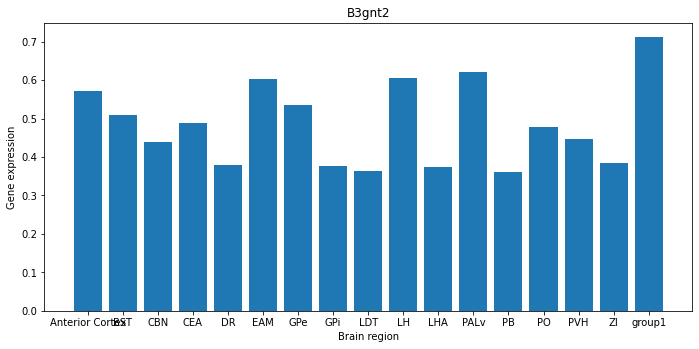

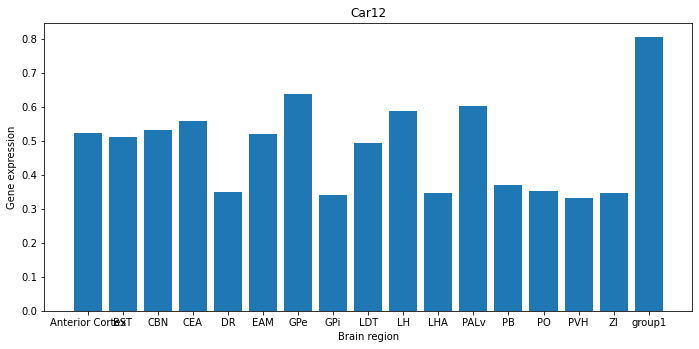

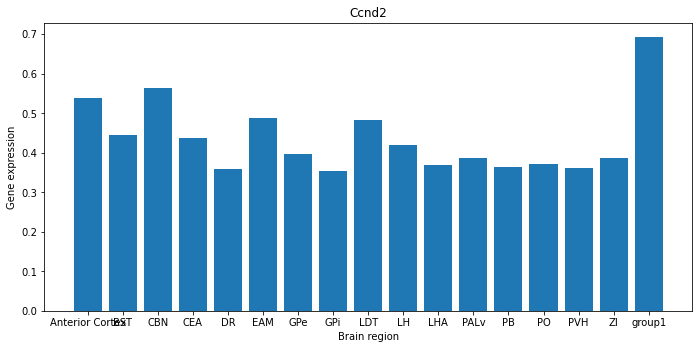

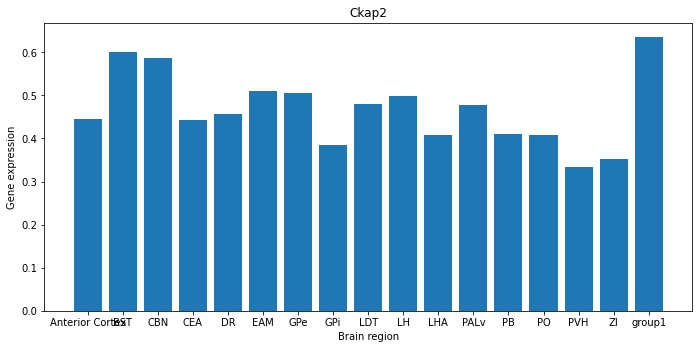

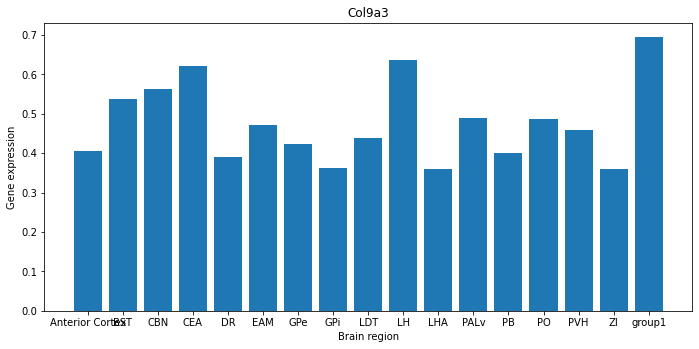

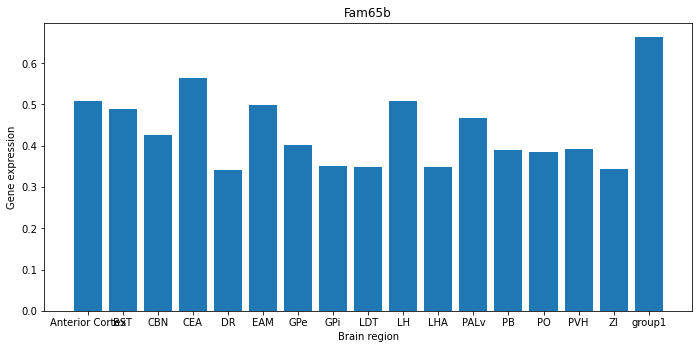

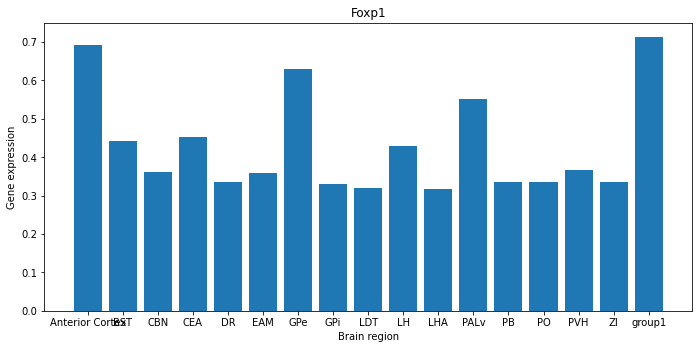

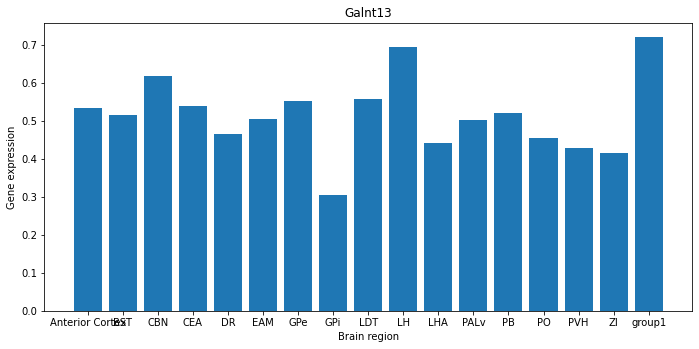

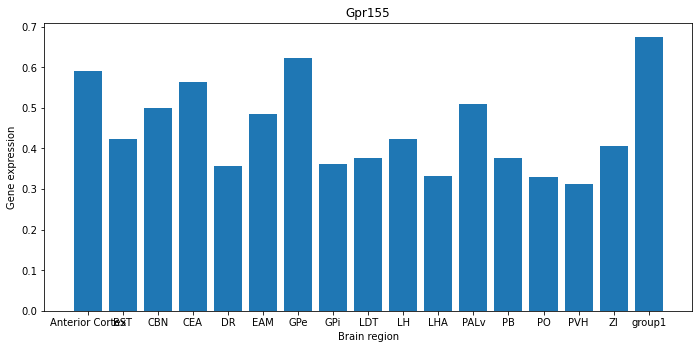

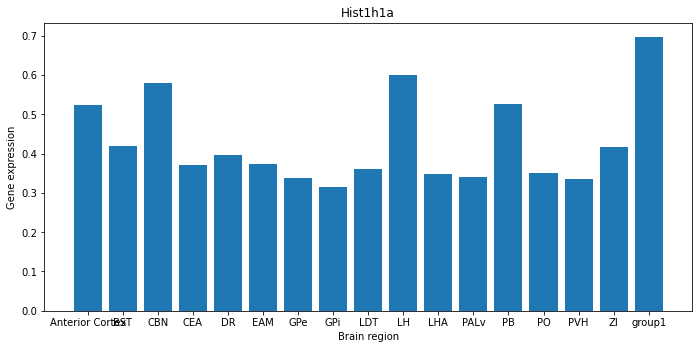

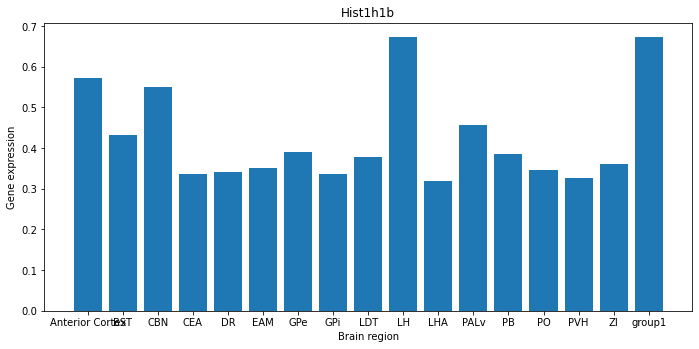

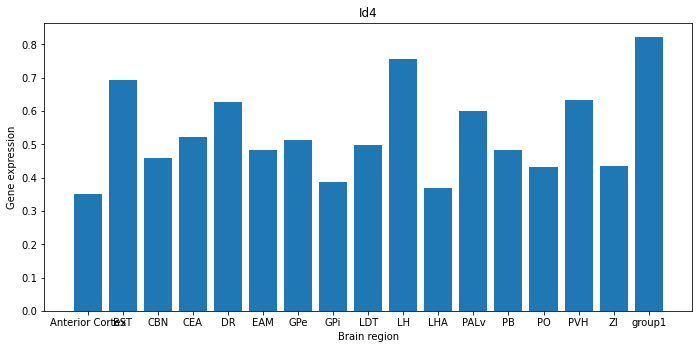

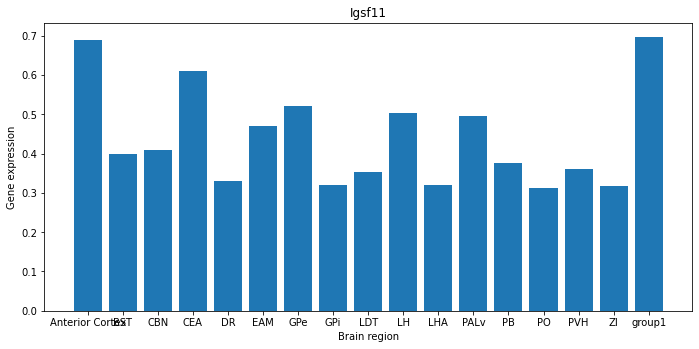

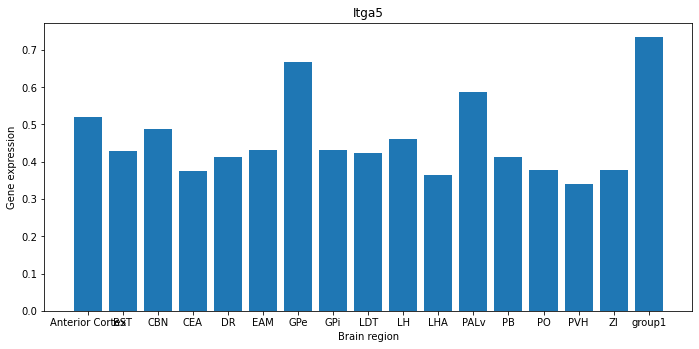

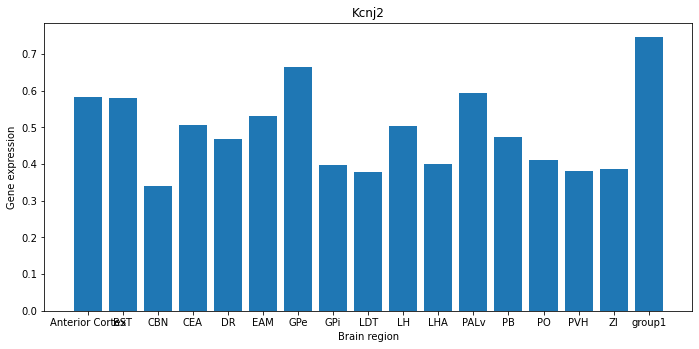

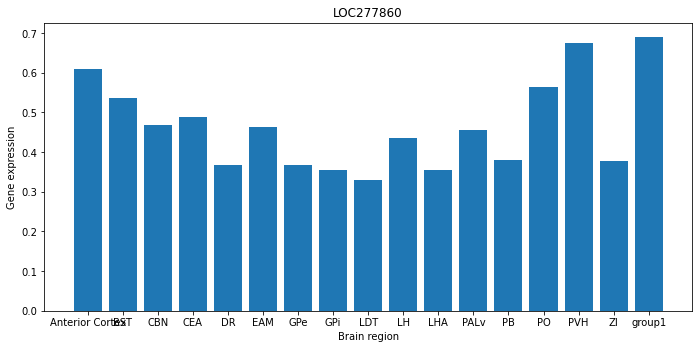

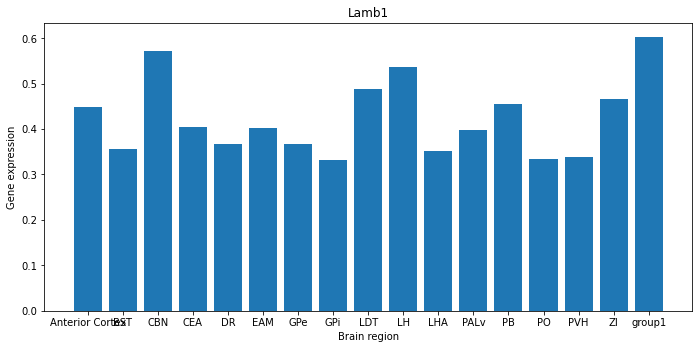

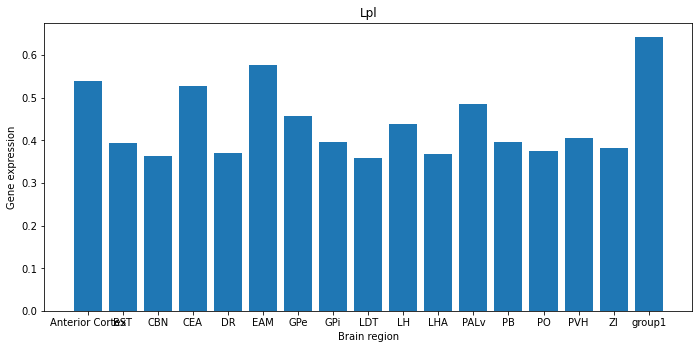

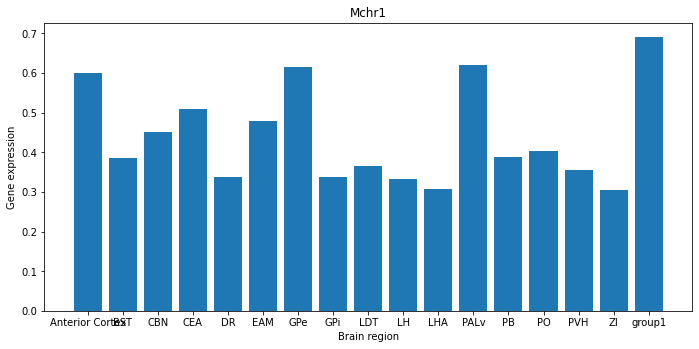

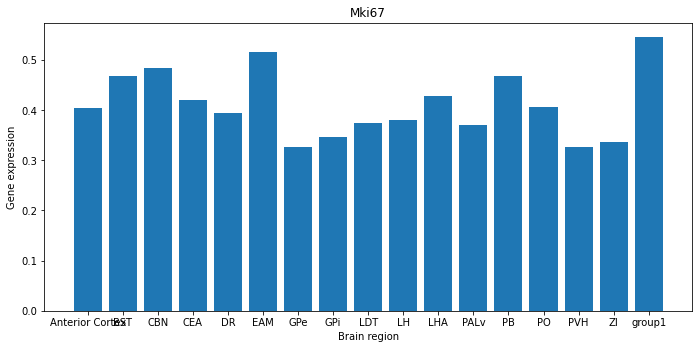

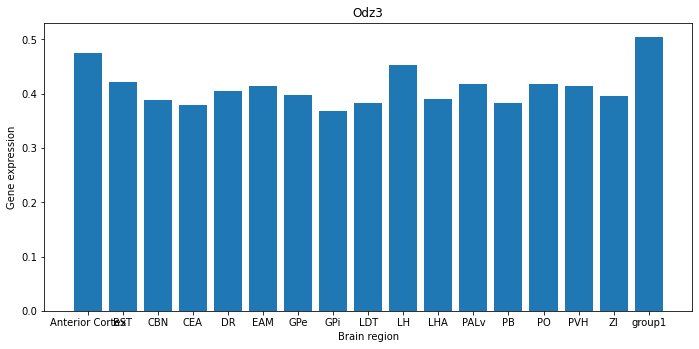

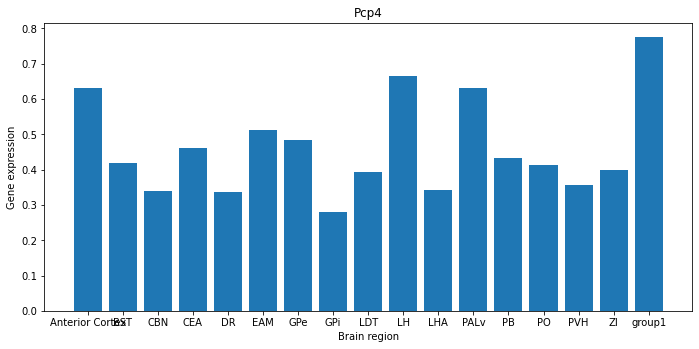

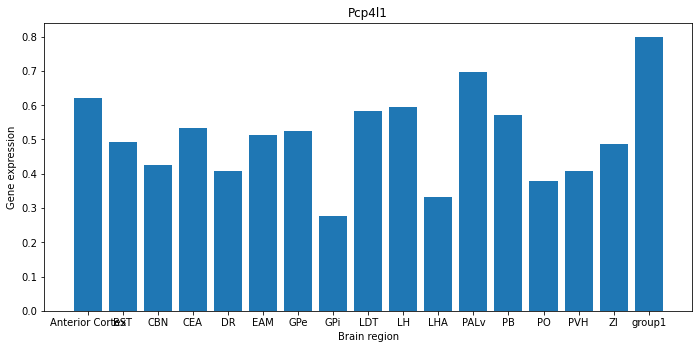

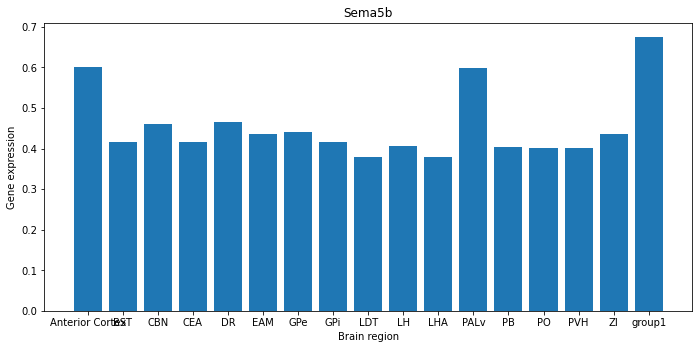

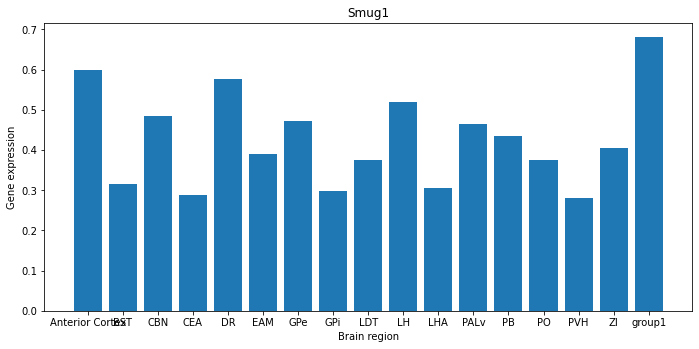

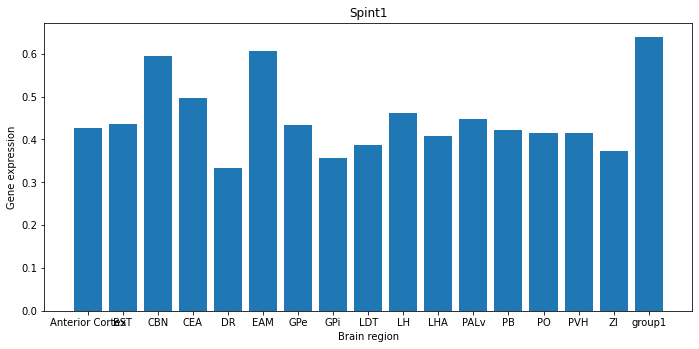

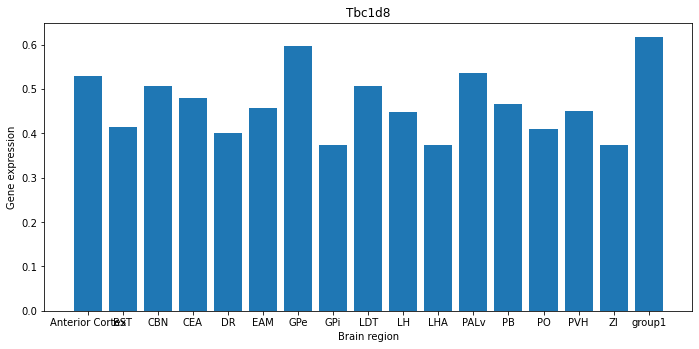

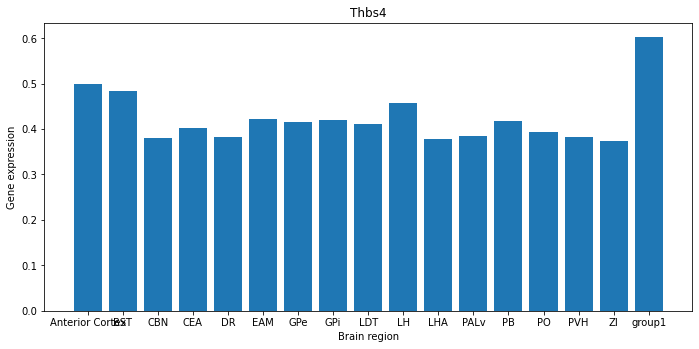

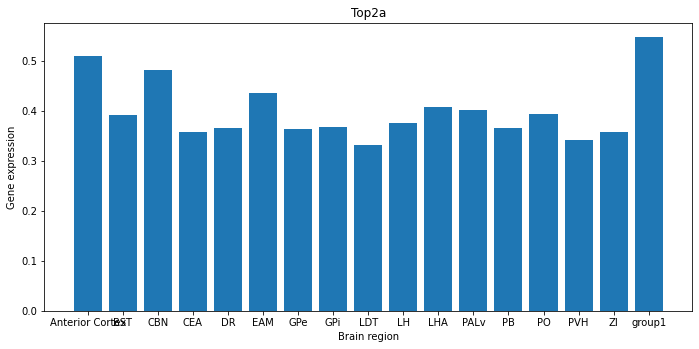

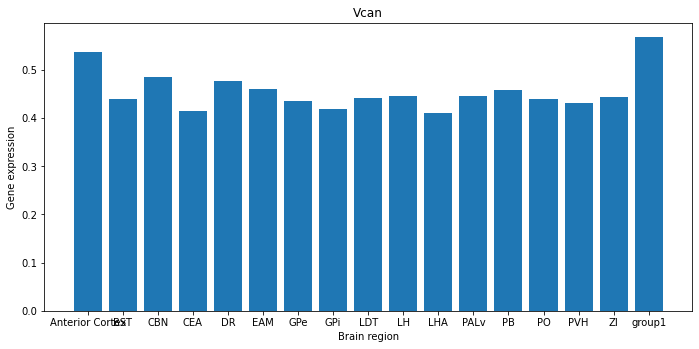

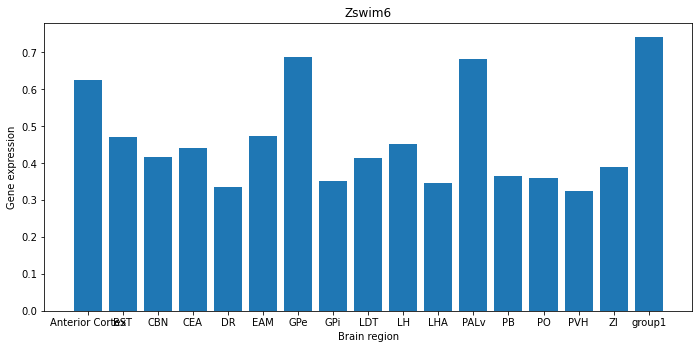

In [17]:
genelist5=plot_high(lst3,thresh=2)

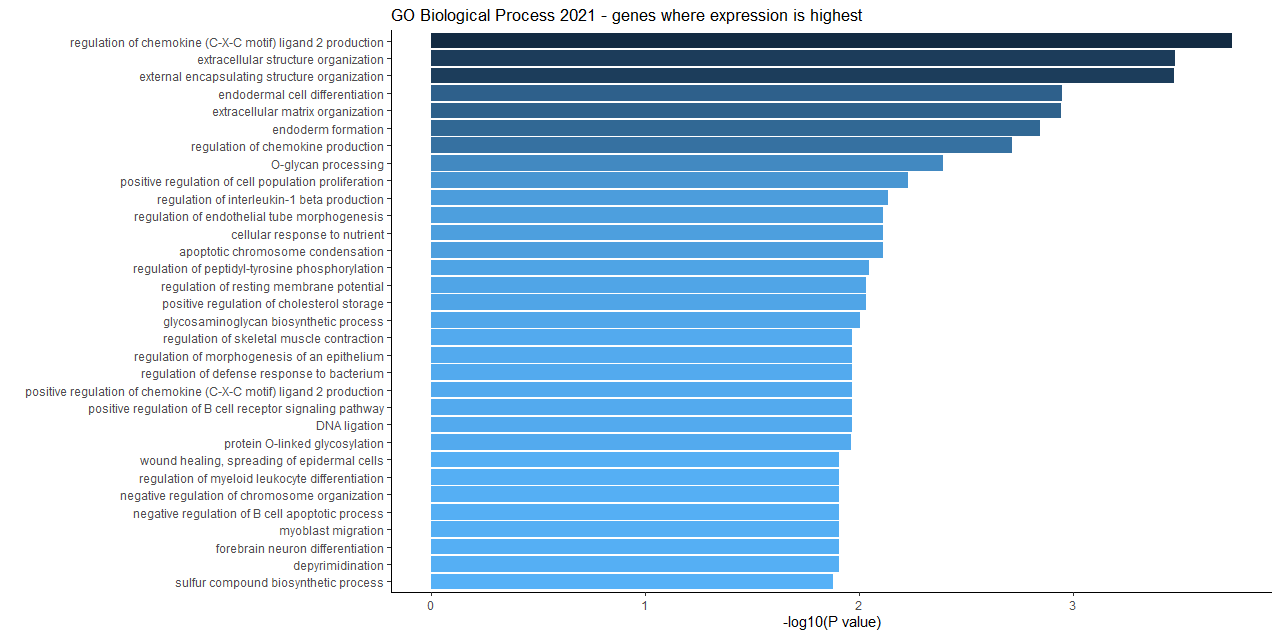

In [18]:
Image('data/NACtoMHB.png')

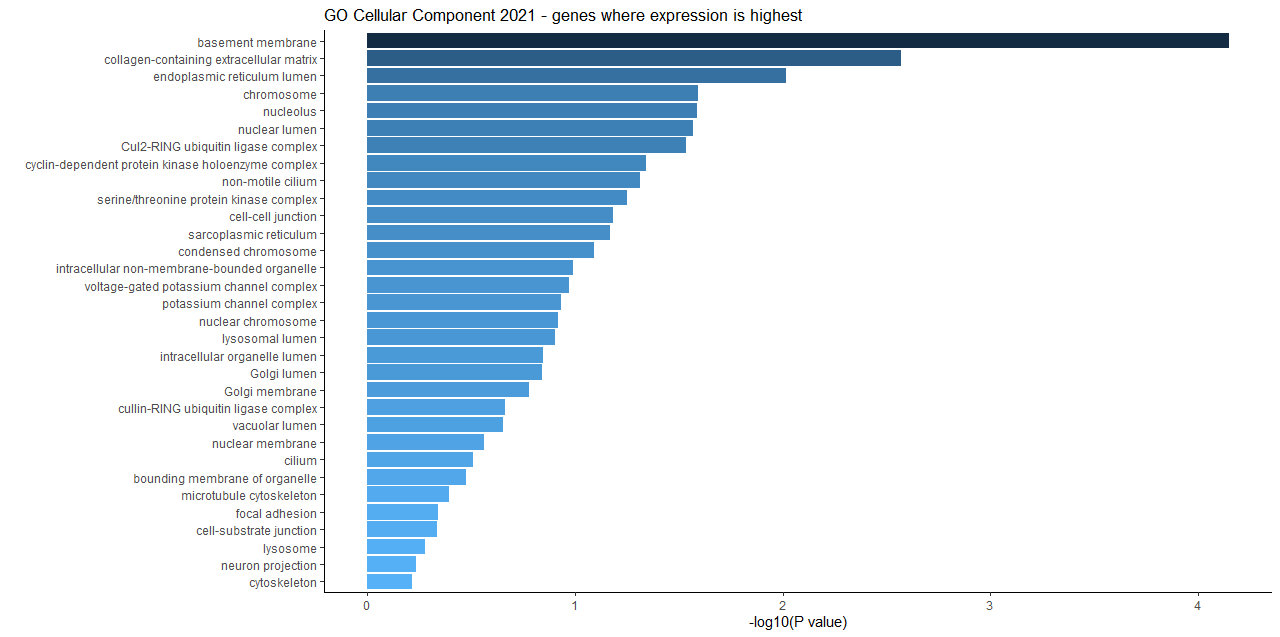

In [19]:
Image('data/NACtoMHB2.png')

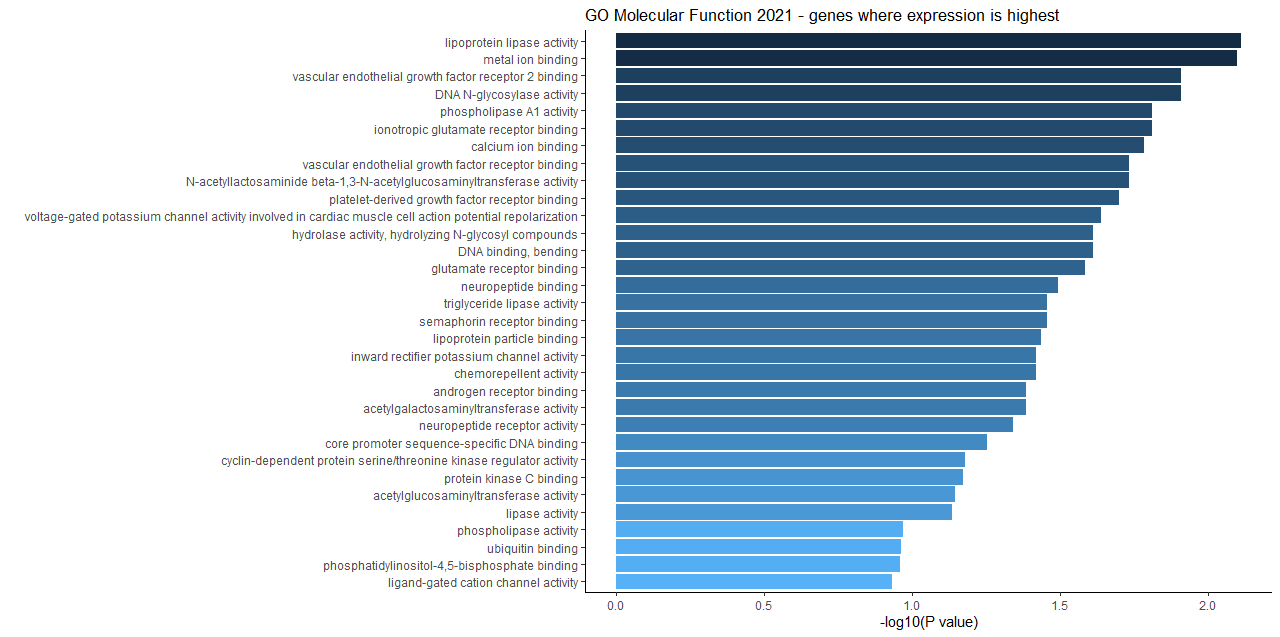

In [20]:
Image('data/NACtoMHB3.png')

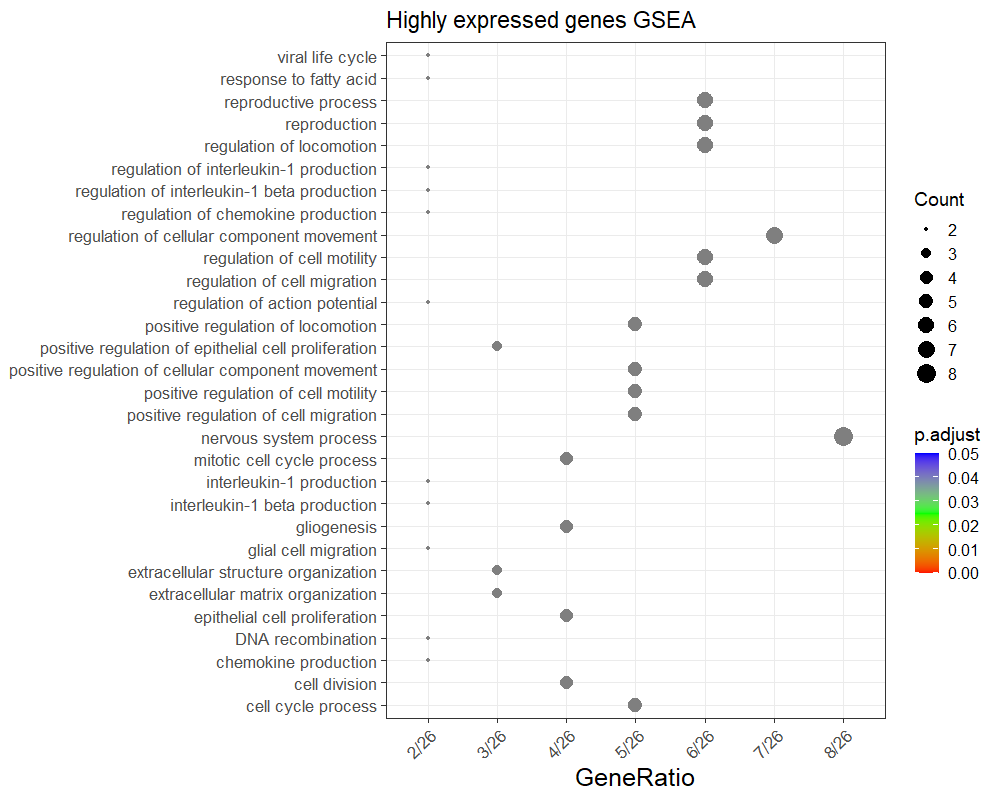

In [21]:
# dotplot_5GO
Image('data/dotplot_5GO.png')

In [22]:
genelist6=plot_low(lst3,thresh=-2)

In [23]:
genelistall=list(gene_exp.columns[1:])
pd.DataFrame(data=genelistall,  columns=['gene_symbol']).to_csv('data/all_genes.csv')